In [6]:
#importing the necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'C:\Users\raghu\Downloads\abalone.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
#The Target Variable of the Abalone Age Prediction is the Abalone Age which is calculated using the given (Rings + 1.5) and then assigning it to the dataset

df['Abalone_Age'] = df['Rings'] + 1.5
df = df.drop('Rings', axis = 1,)

In [11]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 4177 observations with 9 features.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Abalone_Age     4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age'],
      dtype='object')

In [15]:
#Numerical and Ctegorical Features

numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [16]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age'],
      dtype='object')

In [17]:
categorical_features

Index(['Sex'], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Abalone_Age'}>]], dtype=object)

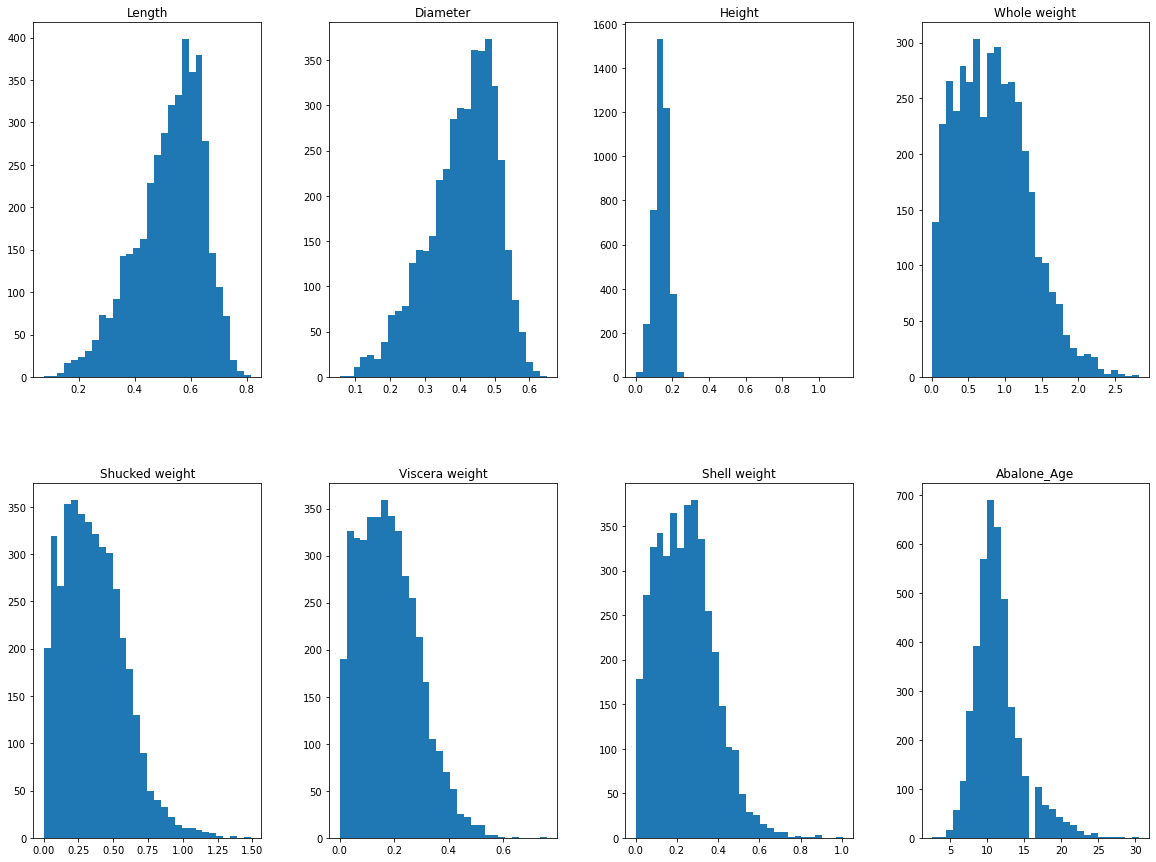

In [18]:
df.hist(figsize=(20,15), grid=False, layout=(2, 4), bins = 30)

In [19]:
from scipy.stats import skew
skew_values = skew(df[numerical_features], nan_policy = 'omit')

temp = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),  pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
temp.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Abalone_Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


<AxesSubplot:xlabel='Sex', ylabel='count'>

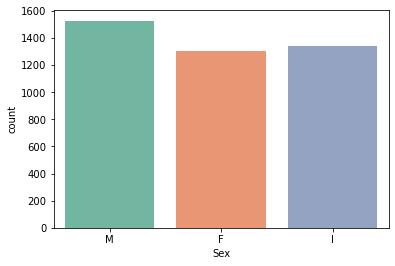

In [20]:
sns.countplot(x = 'Sex', data = df, palette="Set2")

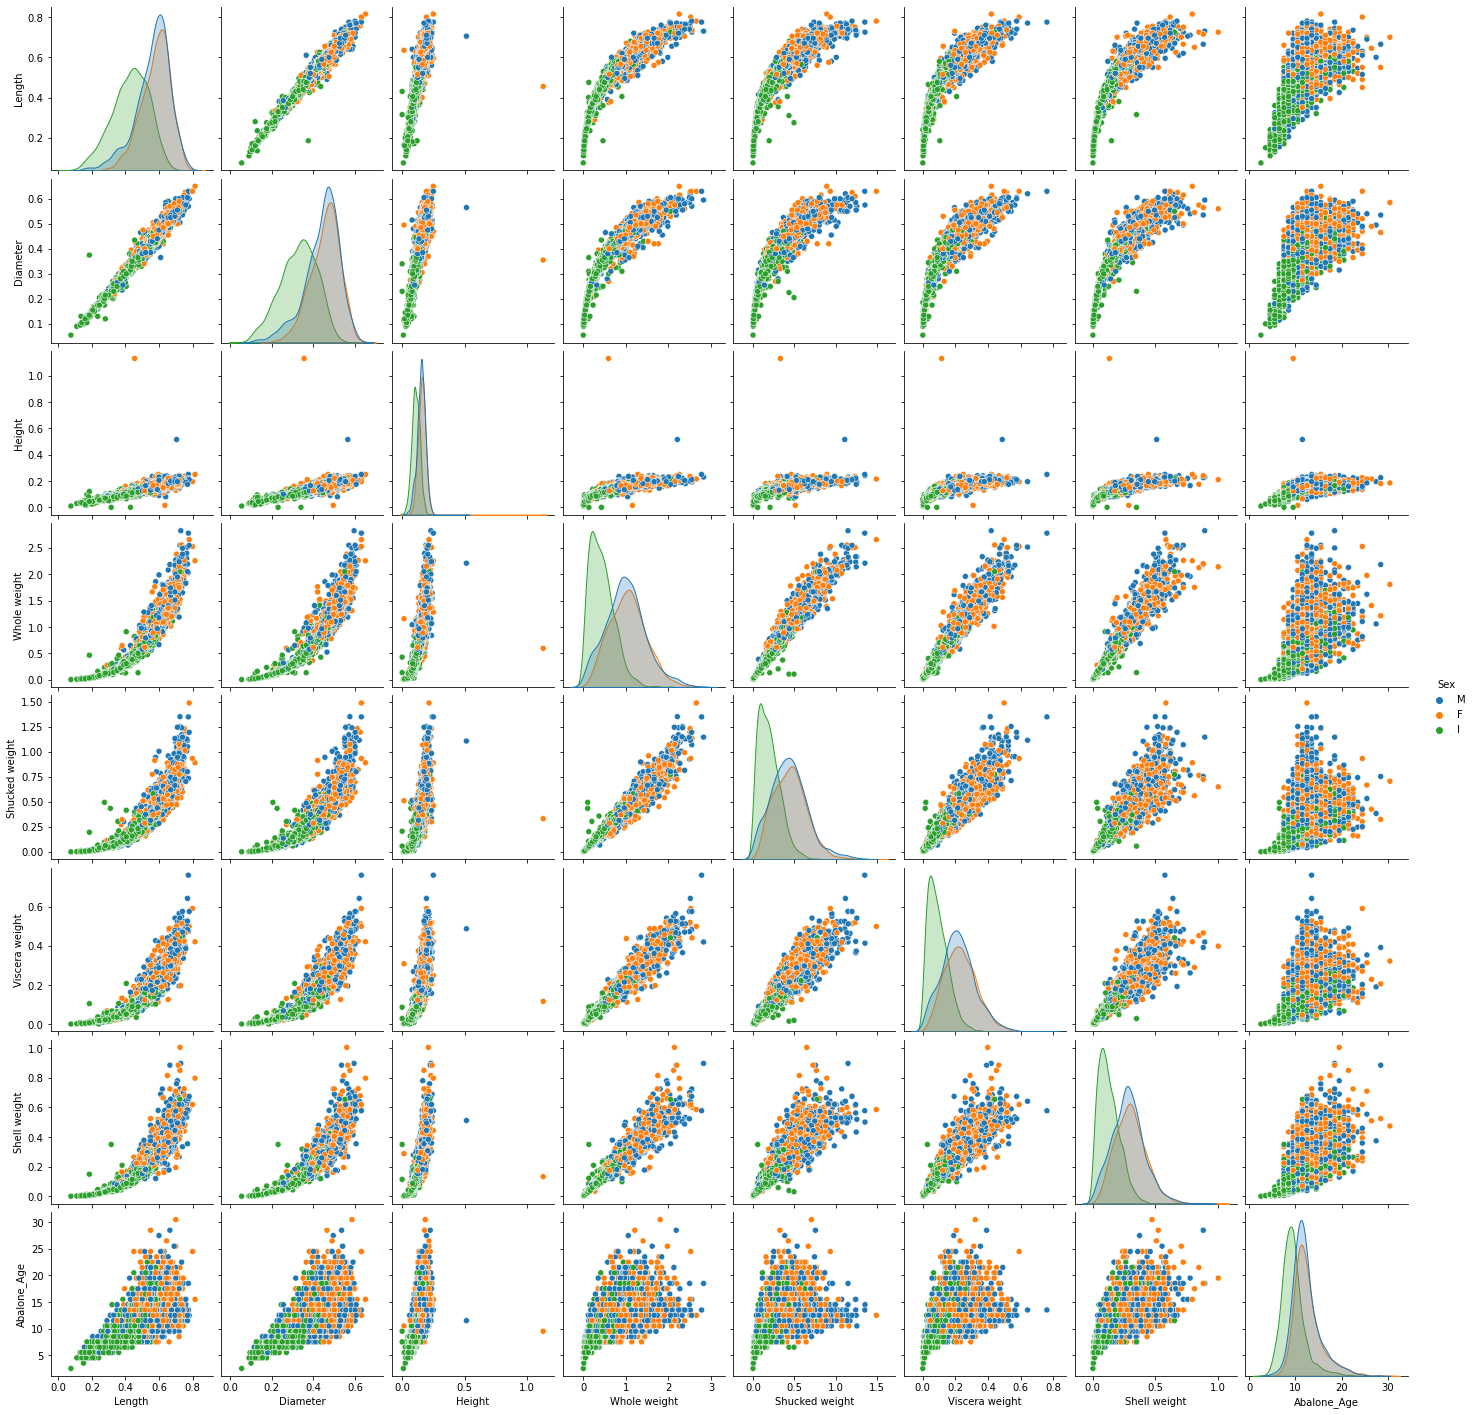

In [21]:
sns.pairplot(df,hue='Sex',diag_kind='kde')
plt.show()

<AxesSubplot:>

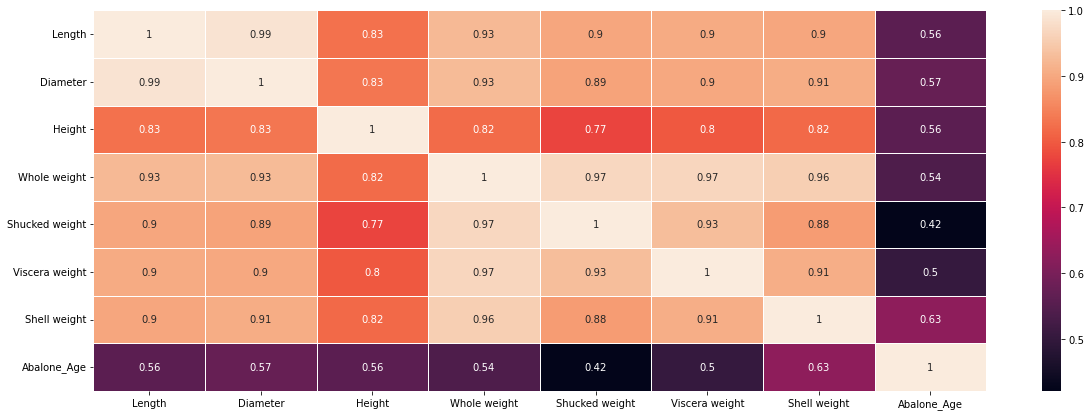

In [22]:

lw = 0.8
lc = "white"

plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True,linewidth= lw, linecolor = lc)

<AxesSubplot:xlabel='Sex', ylabel='Abalone_Age'>

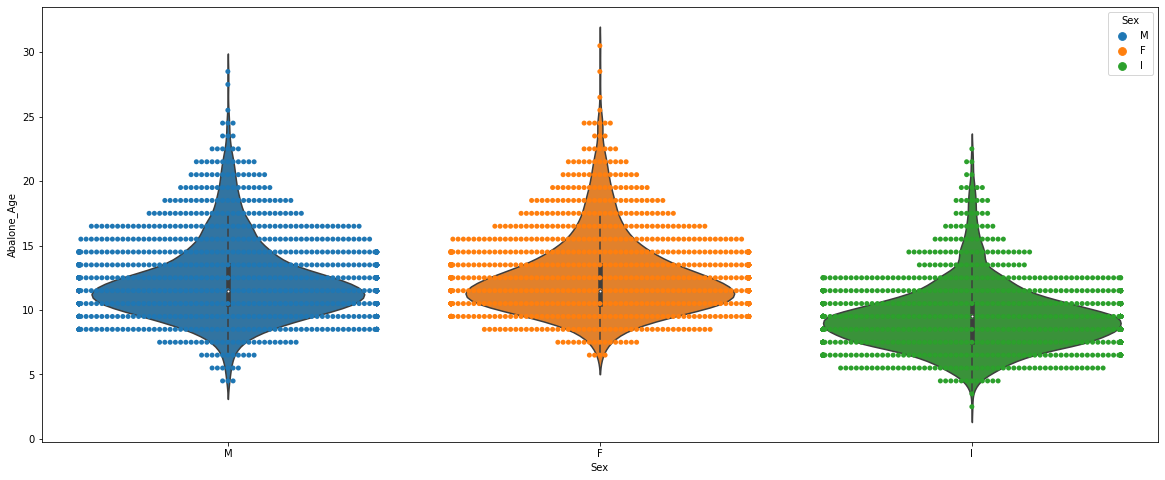

In [23]:
plt.figure(figsize = (20,8))
sns.swarmplot(x = 'Sex', y = 'Abalone_Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Abalone_Age', data = df)

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

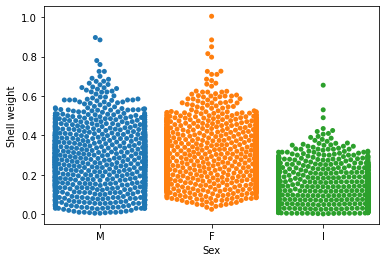

In [24]:
sns.swarmplot(x = df['Sex'], y = df['Shell weight'] )

<AxesSubplot:xlabel='Abalone_Age', ylabel='Height'>

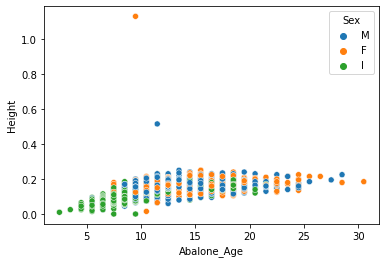

In [25]:
sns.scatterplot(x = df.Abalone_Age, y = df["Height"], hue= df["Sex"])

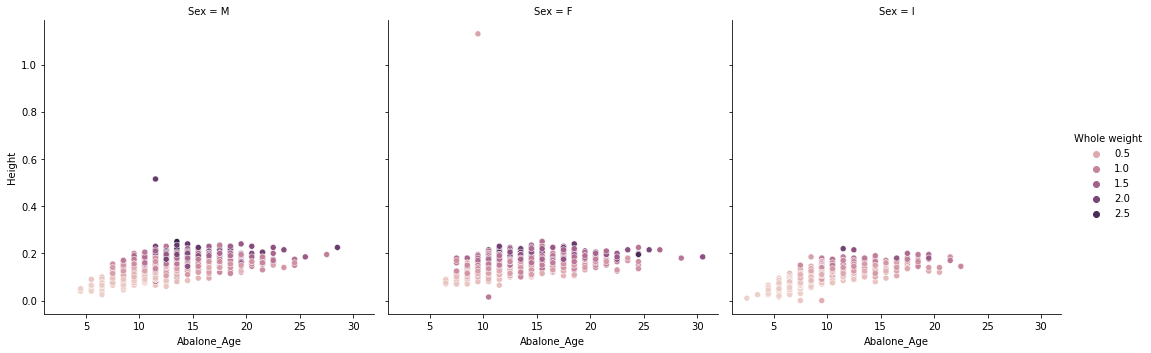

In [26]:
sns.relplot(data=df, x="Abalone_Age", y="Height", hue="Whole weight", col="Sex")

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Abalone_Age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


In [28]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age']].mean().sort_values('Abalone_Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


In [29]:
# Missing values in dataset 

missing_values = df.isnull().sum().sort_values(ascending = False)

In [30]:
missing_values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Abalone_Age       0
dtype: int64

<AxesSubplot:ylabel='Abalone_Age'>

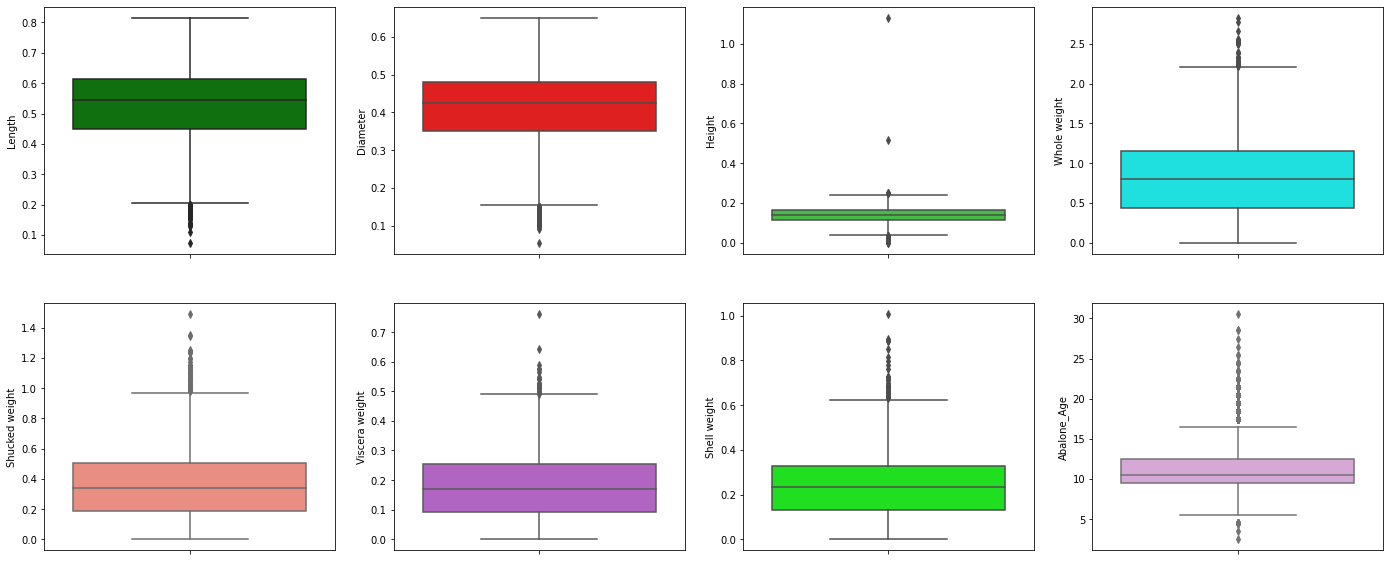

In [31]:
#6. Finding the Outliers and Handling Outliers
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'Abalone_Age', data = df, color = 'plum')

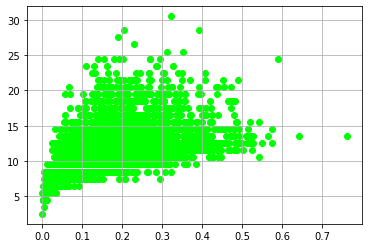

In [32]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color="lime")
plt.grid(True)

In [33]:
# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['Abalone_Age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['Abalone_Age'] > 25)].index, inplace=True)

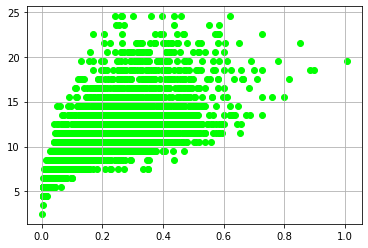

In [34]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='lime')
plt.grid(True)

In [35]:
df.drop(df[(df['Shell weight']> 0.6) & (df['Abalone_Age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['Abalone_Age'] > 25)].index, inplace=True)

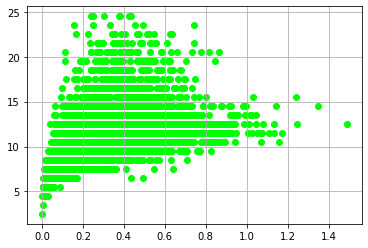

In [36]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='lime')
plt.grid(True)

In [37]:
df.drop(df[(df['Shucked weight']>= 1) & (df['Abalone_Age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['Abalone_Age'] > 20)].index, inplace=True)

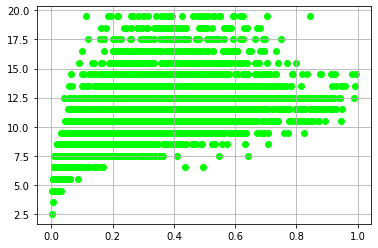

In [38]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='lime')
plt.grid(True)

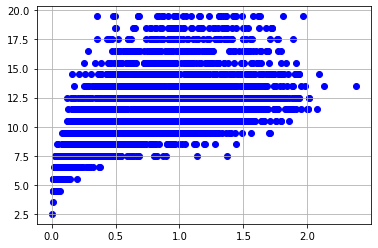

In [39]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='blue')
plt.grid(True)

In [40]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['Abalone_Age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['Abalone_Age'] > 25)].index, inplace=True)

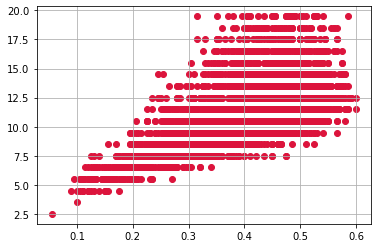

In [41]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='crimson')
plt.grid(True)

In [42]:
df.drop(df[(df['Diameter']<0.1) & (df['Abalone_Age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Abalone_Age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['Abalone_Age']< 25)].index, inplace=True)

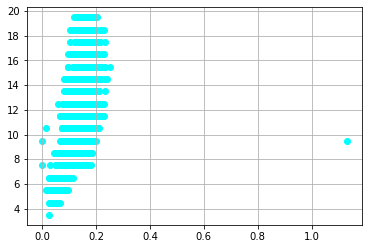

In [43]:
var = 'Height'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='cyan')
plt.grid(True)

In [44]:
df.drop(df[(df['Height']>0.4) & (df['Abalone_Age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['Abalone_Age'] > 25)].index, inplace=True)

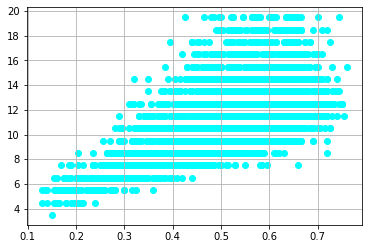

In [45]:
var = 'Length'
plt.scatter(x = df[var], y = df['Abalone_Age'], color='cyan')
plt.grid(True)

In [46]:
df.drop(df[(df['Length']<0.1) & (df['Abalone_Age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['Abalone_Age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['Abalone_Age']< 25)].index, inplace=True)

In [47]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
count,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000
mean,0.518168,0.402955,0.136972,0.791814,0.345022,0.173504,0.227166,11.127284
std,0.117643,0.097127,0.037248,0.451790,0.205040,0.102633,0.125889,2.764955
min,0.130000,0.095000,0.000000,0.010500,0.004500,0.000500,0.003500,3.500000
25%,0.445000,0.345000,0.110000,0.428250,0.179250,0.090000,0.125000,9.500000
50%,0.535000,0.420000,0.140000,0.774500,0.326500,0.165000,0.223500,10.500000
75%,0.610000,0.475000,0.165000,1.123750,0.491500,0.245000,0.315250,12.500000
max,0.760000,0.590000,0.250000,2.381000,0.995500,0.492500,0.600000,19.500000


In [50]:
# Categorical Column - Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [51]:
# transform data
df['Sex'] = encoder.fit_transform(df['Sex'])

In [52]:
df.head(6)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


In [53]:
# Split the data into dependent and independent variables.
X = df.iloc[:, 0:7]
Y = df['Abalone_Age']

In [54]:
X.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395


In [55]:
Y.head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Abalone_Age, dtype: float64

In [56]:
#Scale the independent variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1)

In [59]:
#importing all the neccessary models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
#Testing the model
lr_test_pred = lr.predict(x_test)

In [62]:
lr_test_pred

array([11.78015367, 10.98036805, 12.20470248, ..., 11.66110266,
        5.85691708, 13.06973503])

In [63]:
#measuring the performance
mse = mean_squared_error(y_test, lr_test_pred)
print('Mean Squared error of testing Set: %2f'%mse)

Mean Squared error of testing Set: 3.655732


In [64]:
p = r2_score(y_test, lr_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.52


In [65]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)

Ridge(alpha=0.01, normalize=True)

In [66]:
#Testing the model
ridge_model_pred = ridge_mod.predict(x_test)

In [67]:
ridge_model_pred 

array([11.62214688, 10.96702103, 12.06628438, ..., 11.4402216 ,
        5.74689978, 12.88778428])

In [68]:
#Measuring the performance
acc = r2_score(y_test, ridge_model_pred)
print('Score of testing Set: %2f'%acc)

Score of testing Set: 0.509737


In [69]:
# Decision Tree Regression
dt =  DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [70]:
#Testing the model
dt_test_pred = dt.predict(x_test)

In [71]:
dt_test_pred

array([12.5, 13.5, 15.5, ..., 10.5,  4.5,  9.5])

In [72]:
#Measuring the Performance
dacc = mean_squared_error(y_test, dt_test_pred)
print('Mean Squared Error of testing Set: %2f'%dacc)

Mean Squared Error of testing Set: 6.555463


In [73]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors = 4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [74]:
#Testing the Model
knn_test_pred = knn.predict(x_test)

In [75]:
knn_test_pred

array([12.25, 10.  , 13.  , ..., 10.5 ,  6.  , 14.5 ])

In [76]:
#Measuring the Performance
kacc= r2_score(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kacc)



Score of testing Set: 0.393647


In [77]:
kmse = mean_squared_error(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kmse)

Score of testing Set: 2.693182
